In [116]:
import pandas as pd
import csv
import numpy as np
from random import shuffle
import funcs as fc
import decimal
from copy import deepcopy
import math
import seaborn as sns

In [117]:
ctx = decimal.Context()
ctx.prec = 20

def float_to_str(f):
    """
    Convert the given float to a string,
    without resorting to scientific notation
    """
    d1 = ctx.create_decimal(repr(f))
    return format(d1, 'f')

def getTwoNumbersGap(num1, num2):
    return abs(num1 - num2) + 1

def getRangeGap(data):
    maxV = max(data)
    minV = min(data)
    return getTwoNumbersGap(maxV, minV)

def getMinMaxFromMultiD(sourceList):
    maxValue = max(sourceList.reshape(-1))
    minValue = min(sourceList.reshape(-1))
    
    return maxValue, minValue

def getCategoryDiversityCNT(sourceList):
    return len(set([j for sub in sourceList for j in sub]))

In [118]:
def getOrgAllColumnDivertyCNT(datapath):
    org_moned_dataset = fc.readCSV(datapath, sep='\t')
    print(org_moned_dataset[0])
    org_moned_dataset = org_moned_dataset[1:]
    
    for dataRow in org_moned_dataset:
        dataRow[0] = int(dataRow[0])
        # 원본데이터 각 컬럼별 데이터 diversity count 추출
    
    columnsDiversityCNT = dict()
    
    for i, colName in enumerate(evalColNames):
        if colName in categoricalColNames:
            colIDX = evalColNames.index(colName)
            columnsDiversityCNT[colIDX] = len(set([data[i] for data in org_moned_dataset]))
        else:
            diversityCNT = getRangeGap([float(data[i]) for data in org_moned_dataset])
            columnsDiversityCNT[i] =diversityCNT       
        
        
    return columnsDiversityCNT
    

def getCatetoryColDiversityCNT(cellData):
    cnt = len(cellData.split(','))
    return cnt

def getNumericColDiversityCNT(cellData):
    numericData = [float(data.strip()) for data in cellData.split('-') if data.strip()]
    return getRangeGap(numericData)  

In [119]:
def getLEScore(normalizedDataSet): 
        
    eachColumnLEScoreList = list()    
    normalizedDataSet_cols =normalizedDataSet[0]
    print(normalizedDataSet_cols)
    totalColNum = len(normalizedDataSet_cols)-1
    
    for i, colName in enumerate(normalizedDataSet_cols):
        if colName not in evalColNames: continue
            
        colDataSet = [data[i] for data in normalizedDataSet[1:] if len(data) > 1 ]
        isCategoriCol = colName in categoricalColNames
        colDiversityCNT  = evalColDirvertyDIC[evalColNames.index(colName)]   
        
        colLEScoreList = list()  
        for i, cellData in enumerate(colDataSet):
            if isCategoriCol:
                cellDiversityCNT = getCatetoryColDiversityCNT(cellData)
                
            else:
                try:
                    cellDiversityCNT = getNumericColDiversityCNT(cellData)
                except:
                    print(i, cellData)
                    print(colName)
                    break
                
            
            
            colLEScoreList.append(abs(cellDiversityCNT-1)/abs(colDiversityCNT-1))
            
        colLEScore = sum(colLEScoreList) / len(colDataSet)
        print(colName ,"sum :", sum(colLEScoreList))
        print(colName ,"len :", len(colDataSet))
        print(colName ,"colLEScore :", colLEScore)
        print('')
        eachColumnLEScoreList.append(colLEScore)
    
    leScore = sum(eachColumnLEScoreList)/totalColNum 
    leScore = round(leScore, 7)
    print("totla LE SCORE :", leScore)
    finalResult =[]  
    finalResult.append(['AGE', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CONDITION', 'Total LE SCORE'])
    clonedColLe = deepcopy(eachColumnLEScoreList)
    clonedColLe.append(leScore)
    finalResult.append(clonedColLe)
    
    return finalResult

#### CONST VARs

In [120]:
evalColNames = ['AGE', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CONDITION']
categoricalColNames = ['RACE',  'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CONDITION']
originalDataSet_Path = './data/finalPatientDataSet_20.csv'

recover_bert_cityblock_path = 'recover_bert_cityblock.csv'

In [121]:
origin_dataset = fc.readCSV(originalDataSet_Path, sep='\t')

In [122]:
print(len(origin_dataset))

224886


In [123]:
len(set([data[-2] for data in origin_dataset]))

134

In [124]:
deathData = [data for data in origin_dataset if data[-1] == '1']
len(deathData)

29740

In [125]:
freqDict = dict()
for data in deathData:
    if data[-2] not in freqDict:
        freqDict[data[-2]] = 0
    freqDict[data[-2]] += 1
    
sorted(freqDict.items(), key=lambda x:x[1], reverse = True)

[('Chronic congestive heart failure (disorder)', 4729),
 ('Myocardial Infarction', 3620),
 ('Viral sinusitis (disorder)', 3223),
 ('Stroke', 1900),
 ('Acute viral pharyngitis (disorder)', 1746),
 ('Pneumonia', 1658),
 ('Acute bronchitis (disorder)', 1498),
 ('Seizure disorder', 958),
 ('Bullet wound', 896),
 ('Cardiac Arrest', 891),
 ('Non-small cell carcinoma of lung  TNM stage 1 (disorder)', 471),
 ('Concussion injury of brain', 411),
 ('Neoplasm of prostate', 386),
 ('Streptococcal sore throat (disorder)', 346),
 ('Otitis media', 289),
 ('Drug overdose', 285),
 ('Sprain of ankle', 266),
 ('Polyp of colon', 261),
 ("Alzheimer's disease (disorder)", 223),
 ('Fracture of forearm', 222),
 ('Fracture of the vertebral column with spinal cord injury', 205),
 ('Hyperlipidemia', 203),
 ('Osteoporosis (disorder)', 198),
 ('Malignant tumor of colon', 197),
 ('Normal pregnancy', 186),
 ('Anemia (disorder)', 182),
 ('Concussion with no loss of consciousness', 176),
 ('Overlapping malignant neopl

> Get Data Detalis

In [162]:
convertFileList = ['convert_cityblock_finalPatientDataSet_20.csv','convert_cosine_finalPatientDataSet_20.csv','convert_euclidean_finalPatientDataSet_20.csv']

In [174]:
for filePath in convertFileList:
    convert_pd =  pd.read_csv('./data/'+ filePath, sep='\t')
    minList = convert_pd.describe().loc['min'].tolist()
    maxList = convert_pd.describe().loc['max'].tolist()
    meanList = convert_pd.describe().loc['mean'].tolist()
    print(filePath)
    print(convert_pd.describe())
    for idx in range(len(meanList)):
        colName = convert_pd.columns[idx]
        minVal = round(minList[idx], 2)
        maxVal = round(maxList[idx], 2)
        
        print(colName, str(maxVal) +' ~ '+ str(minVal))
        
    print("")
    
    

convert_cityblock_finalPatientDataSet_20.csv
                 AGE           RACE      ETHNICITY         GENDER  \
count  224885.000000  224885.000000  224885.000000  224885.000000   
mean       43.378349    -108.391105    -191.808204     -38.211414   
std        26.369902     121.157679      87.559517      40.095900   
min         0.000000    -256.738524    -269.124552     -79.211568   
25%        22.000000    -256.738524    -248.287498     -79.211568   
50%        41.000000       1.000000    -221.118718       1.000000   
75%        61.000000       1.000000    -204.384017       1.000000   
max       110.000000       1.000000       1.000000       1.000000   

          BIRTHPLACE      CONDITION          DEATH  
count  224885.000000  224885.000000  224885.000000  
mean      -74.365918    -164.947876       0.132245  
std       112.615301      46.477501       0.338758  
min      -269.536517    -301.369577       0.000000  
25%      -225.976409    -204.842931       0.000000  
50%         1.0

In [158]:
convert_finalPatientDataSet_20 = pd.read_csv('./data/convert_cityblock_finalPatientDataSet_20.csv', sep='\t')

In [160]:
print(convert_finalPatientDataSet_20.describe().loc['mean'])
print(convert_finalPatientDataSet_20.describe().loc['max'])
print(convert_finalPatientDataSet_20.describe().loc['min'])

AGE            43.378349
RACE         -108.391105
ETHNICITY    -191.808204
GENDER        -38.211414
BIRTHPLACE    -74.365918
CONDITION    -164.947876
DEATH           0.132245
Name: mean, dtype: float64
AGE           110.0
RACE            1.0
ETHNICITY       1.0
GENDER          1.0
BIRTHPLACE      1.0
CONDITION       1.0
DEATH           1.0
Name: max, dtype: float64
AGE             0.000000
RACE         -256.738524
ETHNICITY    -269.124552
GENDER        -79.211568
BIRTHPLACE   -269.536517
CONDITION    -301.369577
DEATH           0.000000
Name: min, dtype: float64


#### Origin Code Test

In [127]:
org_moned_dataset = fc.readCSV('./normalized/recover_origin_wc.csv', sep='\t')

In [128]:
evalColDirvertyDIC = getOrgAllColumnDivertyCNT(originalDataSet_Path)
evalColDirvertyDIC

['AGE', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CONDITIOIN', 'DEATH']


{0: 111.0, 1: 6, 2: 24, 3: 2, 4: 27, 5: 133}

#### Measure LM Score

In [129]:
def exeLeScore(path):
    print(path, "LE Score")
    bert_wc_cosine_dataset = fc.readCSV('./normalized/'+path+'.csv', sep='\t')
    print(len(bert_wc_cosine_dataset)-1)
    result = getLEScore(bert_wc_cosine_dataset)
    print("=========================================================")
    return result

In [130]:
leDict = dict()

In [131]:
#### k_A_dataset_org_0613 오리지널 데이터 
result0 = exeLeScore('k_A_dataset_org_0613')
leDict['Original']= result0

k_A_dataset_org_0613 LE Score
224885
['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']
AGE sum : 2068.899999998535
AGE len : 224885
AGE colLEScore : 0.009199813237870622

BIRTHPLACE sum : 139.8076923076881
BIRTHPLACE len : 224885
BIRTHPLACE colLEScore : 0.0006216852716174404

CONDITION sum : 1254.2878787868992
CONDITION len : 224885
CONDITION colLEScore : 0.005577463498174174

ETHNICITY sum : 107.39130434782224
ETHNICITY len : 224885
ETHNICITY colLEScore : 0.000477538761357237

GENDER sum : 0.0
GENDER len : 224885
GENDER colLEScore : 0.0

RACE sum : 9.999999999999996
RACE len : 224885
RACE colLEScore : 4.446717211018964e-05

totla LE SCORE : 0.0026535


In [132]:
#### recover_bert_wc_cosine 코사인
result1 = exeLeScore('recover_bert_wc_cosine')
leDict['Cosine']= result1

recover_bert_wc_cosine LE Score
224885
['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']
AGE sum : 2037.309090907671
AGE len : 224885
AGE colLEScore : 0.009059337398704542

BIRTHPLACE sum : 1459.076923076421
BIRTHPLACE len : 224885
BIRTHPLACE colLEScore : 0.006488102466044516

CONDITION sum : 3578.2045454646263
CONDITION len : 224885
CONDITION colLEScore : 0.015911263736863846

ETHNICITY sum : 5997.652173923258
ETHNICITY len : 224885
ETHNICITY colLEScore : 0.026669863147489863

GENDER sum : 7634.0
GENDER len : 224885
GENDER colLEScore : 0.03394623918891878

RACE sum : 4759.399999997862
RACE len : 224885
RACE colLEScore : 0.02116370589411416

totla LE SCORE : 0.0188731


In [133]:
#### recover_bert_wc_cosine 유클리디언
result2 = exeLeScore('recover_bert_wc_euclidean')
leDict['Euclidean']= result2

recover_bert_wc_euclidean LE Score
224885
['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']
AGE sum : 1937.4636363623094
AGE len : 224885
AGE colLEScore : 0.00861535289753567

BIRTHPLACE sum : 1367.538461538053
BIRTHPLACE len : 224885
BIRTHPLACE colLEScore : 0.006081056813651658

CONDITION sum : 2521.1893939436322
CONDITION len : 224885
CONDITION colLEScore : 0.011211016270287623

ETHNICITY sum : 5613.000000007703
ETHNICITY len : 224885
ETHNICITY colLEScore : 0.024959423705483708

GENDER sum : 9080.0
GENDER len : 224885
GENDER colLEScore : 0.04037619227605221

RACE sum : 3686.3999999990197
RACE len : 224885
RACE colLEScore : 0.016392378326695954

totla LE SCORE : 0.0179392


In [134]:
#### recover_bert_wc_cosine 맨하탄
result3 = exeLeScore('recover_bert_wc_cityblock')
leDict['Cityblock']= result3

recover_bert_wc_cityblock LE Score
224885
['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']
AGE sum : 1889.6545454532445
AGE len : 224885
AGE colLEScore : 0.008402759390147162

BIRTHPLACE sum : 1272.3076923074534
BIRTHPLACE len : 224885
BIRTHPLACE colLEScore : 0.005657592513095375

CONDITION sum : 2390.371212124275
CONDITION len : 224885
CONDITION colLEScore : 0.010629304809677281

ETHNICITY sum : 8114.782608707288
ETHNICITY len : 224885
ETHNICITY colLEScore : 0.036084143489816076

GENDER sum : 7848.0
GENDER len : 224885
GENDER colLEScore : 0.03489783667207684

RACE sum : 3736.9999999989486
RACE len : 224885
RACE colLEScore : 0.0166173822175732

totla LE SCORE : 0.0187148


In [135]:
columns

['AGE',
 'RACE',
 'ETHNICITY',
 'GENDER',
 'BIRTHPLACE',
 'CONDITION',
 'Total LE SCORE']

In [136]:
### 막대그래프용 데이터 만들기
leColumns = ['AGE', 'BIRTHPLACE', 'CONDITION', 'ETHNICITY', 'GENDER', 'RACE', 'TOTAL LE SCORE']

leBarChartDataList = []
leTableDataList = [['AGE'], ['BIRTHPLACE'], ['CONDITION'], ['ETHNICITY'], ['GENDER'], ['RACE'], ['TOTAL LE SCORE']]
# leList.append()

for key, item in leDict.items():
    
    
    columns = item[0]
    
    valueRow = None
    for i, value in enumerate(item[1]):
        
        colName = leColumns[i]
        roundedVal = float(float_to_str(round(value, 7)))
        
        valueRow = [colName, roundedVal, key]                
        leBarChartDataList.append(valueRow) 
        leTableDataList[i].append(float_to_str(round(value, 7)))
        
        


In [137]:
talbe_pd = pd.DataFrame(leTableDataList, columns=['Column', 'Cosine', 'Euclindean', 'Manhattan', 'Origianl'])
talbe_pd.to_csv('./output/LEScore_Table.csv', encoding='utf-8', index=False)

#### LE Score 비교 막대그래프

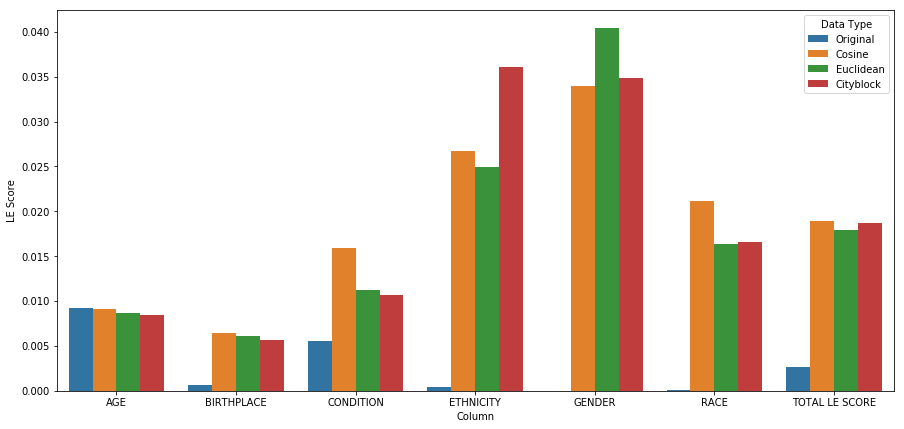

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))


dataSource_pd = pd.DataFrame(leBarChartDataList, columns=['Column', 'LE Score', 'Data Type'])
sns.barplot(data=dataSource_pd, x='Column', y='LE Score', hue='Data Type')

In [139]:
dataSource_pd

,Column,LE Score,Data Type
0,AGE,0.009200,Original
1,BIRTHPLACE,0.000622,Original
2,CONDITION,0.005577,Original
3,ETHNICITY,0.000478,Original
4,GENDER,0.000000,Original
5,RACE,0.000044,Original
6,TOTAL LE SCORE,0.002654,Original
7,AGE,0.009059,Cosine
8,BIRTHPLACE,0.006488,Cosine
9,CONDITION,0.015911,Cosine


In [ ]:
['컬럼', '값', '데이터 셋 종류']